**Presented by: Reza Saadatyar (2024-2025)**<br/>
**E-mail: Reza.Saadatyar@outlook.com**

**1️⃣ Reading, writing, & displaying images**<br/>
**2️⃣ Grayscaling**<br/>
**3️⃣ Cropping**<br/>
**4️⃣ HSV**<br/>
**5️⃣ Split the image into its components**<br/>
**6️⃣ Merge the individual channels into one image**<br/>


<font color='#FF000e' size="4.8" face="Arial"><b>Import modules</b></font>

In [20]:
import os
import sys
import cv2       # cv2.__version__
import numpy as np
import matplotlib.pyplot as plt

In [21]:
print(os.getcwd())
print(sys.executable)

d:\Computer-Vision\Code
c:\Users\rsaad\AppData\Local\Programs\Python\Python312\python.exe


<font color=#00ff21 size="4.8" face="Arial"><b>1️⃣ Reading, writing, & displaying images</b></font>

In [22]:
# Define the path to the image directory
path_img = "d:/Computer-Vision/Images/"

# Load the image by concatenating the path and filename
img = cv2.imread(path_img + 'Flower.JPG')

# Display the loaded image in a window titled 'Flower'
cv2.imshow('Flower', img)

# Wait for 1 millisecond to allow the window to update and display the image
cv2.waitKey(1000)

# Close all OpenCV windows to clean up resources
cv2.destroyAllWindows()

In [23]:
# Print the height of the image (number of rows in the image array)
print('Height of Image:', int(img.shape[0]), 'pixels')

# Print the width of the image (number of columns in the image array)
print('Width of Image:', int(img.shape[1]), 'pixels')

Height of Image: 118 pixels
Width of Image: 198 pixels


In [24]:
print (img.shape)
type(img)

(118, 198, 3)


numpy.ndarray

In [25]:
# Simply use 'imwrite' specificing the file name and the image to be saved
cv2.imwrite(path_img + 'output.jpg', img)
cv2.imwrite(path_img + 'output.png', img)

True

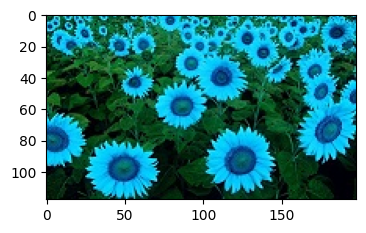

In [28]:
# Create a new figure with a specified size of 4 inches (width) by 3 inches (height)
plt.figure(figsize=[4, 3])

# Display the image `img` using the default colormap and scaling
plt.imshow(img);

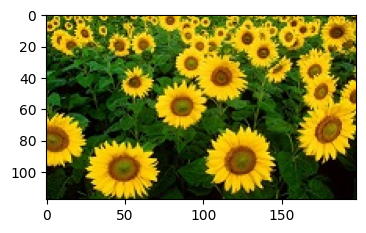

In [29]:
# Create a new figure with a specified size of 4 inches (width) by 3 inches (height)
plt.figure(figsize=[4, 3])

# Display the image `img` after reversing the color channels (RGB to BGR or vice versa)
# `img[:, :, ::-1]` or `img[..., ::-1]` reverses the order of the color channels along the last axis
plt.imshow(img[:, :, ::-1]);  # img[:,:, ::-1] == img[..., ::-1]

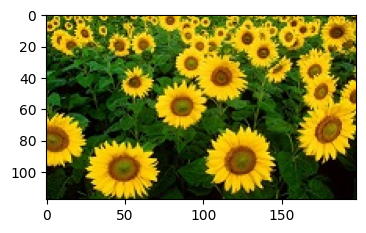

In [30]:
# Create a new figure with a specified size of 4 inches (width) by 3 inches (height)
plt.figure(figsize=[4, 3])

# Convert the image `img` from BGR color space (commonly used in OpenCV) to RGB color space
# OpenCV loads images in BGR format by default, but Matplotlib expects images in RGB format
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the converted RGB image using Matplotlib
plt.imshow(rgb_image);

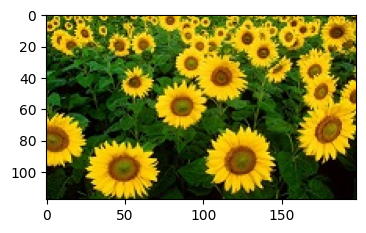

In [31]:
# Create a new figure with a specified size of 4 inches (width) by 3 inches (height)
plt.figure(figsize=[4, 3])

# Modify a rectangular region of the image (rows 200 to 300 and columns 300 to 500)
# Set all color channels (R, G, B) to 0, making this region black
img[200:300, 300:500, :] = 0

# Alternatively, you can set the region to a specific color, such as red (BGR format: (0, 0, 255))
# Uncomment the line below to make the region red instead of black
# img[200:300, 300:500, :] = (0, 0, 255)

# Display the modified image after converting it from BGR to RGB
# `img[..., ::-1]` reverses the color channels to match Matplotlib's RGB format
plt.imshow(img[..., ::-1]);  # BGR convert to RGB

<font color=#f50caf size="4.8" face="Arial"><b>2️⃣ Grayscaling</b></font>

In [35]:
# Load an image from the specified path
# `cv2.imread` reads the image in BGR format by default
img = cv2.imread(path_img + "Flower.JPG")

# Display the original image in a window titled "Original"
cv2.imshow("Original", img)

# Convert the original BGR image to grayscale
# `cv2.COLOR_BGR2GRAY` is the flag used for this conversion
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Alternatively, you can load the image directly in grayscale using:
# gray_img = cv2.imread(path_img + "Flower.JPG", 0)

# Display the grayscale image in a window titled "Gray"
cv2.imshow("Gray", gray_img)

# Wait for 1 millisecond to allow the window to update
cv2.waitKey(1)

# Close all OpenCV windows
cv2.destroyAllWindows()

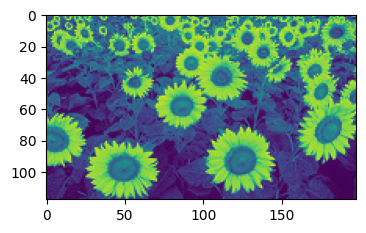

In [36]:
# Create a new figure with a specified size of 4 inches (width) by 3 inches (height)
plt.figure(figsize=[4, 3])

# Display the grayscale image `gray_img` using Matplotlib
plt.imshow(gray_img);

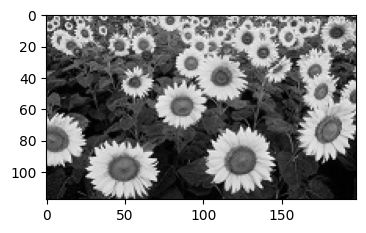

In [37]:
# Create a new figure with a specified size of 4 inches (width) by 3 inches (height)
plt.figure(figsize=[4, 3])

# Display the grayscale image `gray_img` using Matplotlib with the grayscale colormap
plt.imshow(gray_img, cmap="gray");

In [40]:
# Extract the Blue, Green, and Red channel values for the pixel at location (30, 70)
B, G, R = img[30, 70]

# Print the shape of the original image and the color channel values
print(f"Original:\nShape: {img.shape}, B: {B}, G: {G}, R: {R}")

# Print the shape of the grayscale image and the intensity value for the same pixel
print(f"Gray:\nShape: {gray_img.shape}, {gray_img[30, 70]}")

# Calculate the grayscale intensity using the standard luminance formula
# Formula: 0.2989 * R + 0.5870 * G + 0.1140 * B
# This is the standard formula used to convert RGB to grayscale
print(round(0.2989 * R + 0.5870 * G + 0.1140 * B))

Original:
Shape: (118, 198, 3), B: 19, G: 105, R: 45
Gray:
Shape: (118, 198), 77
77


<font color=#f3db04 size="4.5" face="Arial"><b>3️⃣ Cropping</b></font>

cropped.shape = (50, 48, 3)   img.shape = (118, 198, 3)


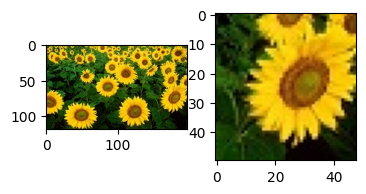

In [45]:
# Extract the height and width of the image
height, width = img.shape[:2]

# Use indexing to crop out a rectangular region from the image
# The region is defined by rows 50 to 100 and columns 150 to 300
cropped = img[50:100, 150:300, :]

# Print the shapes of the original image and the cropped region
print(f"{cropped.shape = }   {img.shape = }")

# Create a new figure with a specified size of 4 inches (width) by 4 inches (height)
plt.figure(figsize=[4, 4])

# Display the original image in the first subplot (1 row, 2 columns, position 1)
# `img[..., ::-1]` converts the image from BGR (OpenCV default) to RGB (Matplotlib default)
plt.subplot(121); plt.imshow(img[..., ::-1])

# Display the cropped region in the second subplot (1 row, 2 columns, position 2)
# `cropped[..., ::-1]` converts the cropped region from BGR to RGB
plt.subplot(122); plt.imshow(cropped[..., ::-1]);

<font color=#07f1ca size=4.5, face="Arial"><b>5️⃣ Split the image into its components</b></font>

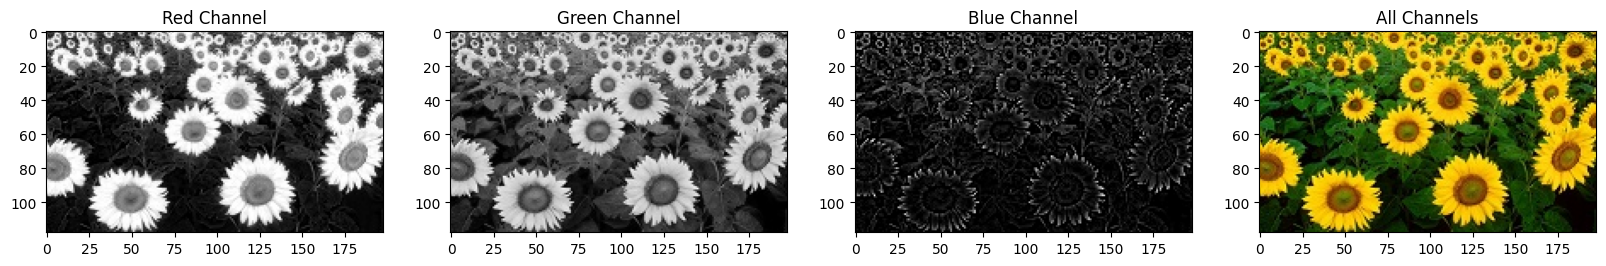

In [47]:
# Split the image into its individual Blue, Green, and Red components
# `cv2.split(img)` returns three 2D arrays representing the B, G, and R channels
b, g, r = cv2.split(img)

# Show the individual channels and the original image
plt.figure(figsize=[20, 5])

# Display the Red channel in the first subplot (1 row, 4 columns, position 1)
plt.subplot(141); plt.imshow(r, cmap='gray'); plt.title("Red Channel")

# Display the Green channel in the second subplot (1 row, 4 columns, position 2)
plt.subplot(142); plt.imshow(g, cmap='gray'); plt.title("Green Channel")

# Display the Blue channel in the third subplot (1 row, 4 columns, position 3)
plt.subplot(143); plt.imshow(b, cmap='gray'); plt.title("Blue Channel")

# Display the original image in the fourth subplot (1 row, 4 columns, position 4)
# `img[..., ::-1]` converts the image from BGR (OpenCV default) to RGB (Matplotlib default)
plt.subplot(144); plt.imshow(img[..., ::-1]); plt.title("All Channels");

<font color=#d50ce7 size=4.5 face="Arial"><b>6️⃣ Merge the individual channels into one image</b></font>

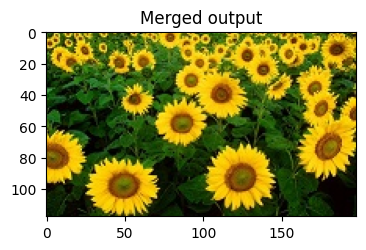

In [ ]:
# Merge the individual Blue, Green, and Red channels back into one image
# `cv2.merge([b, g, r])` combines the three 2D arrays into a 3D BGR image
merged_img = cv2.merge([b, g, r])

# Display the merged image
plt.figure(figsize=(4, 3))  # Create a figure with a specified size of 4x3 inches
plt.imshow(merged_img[:, :, ::-1])  # Convert BGR to RGB for correct display in Matplotlib
plt.title("Merged Output");  # Add a title to the plot

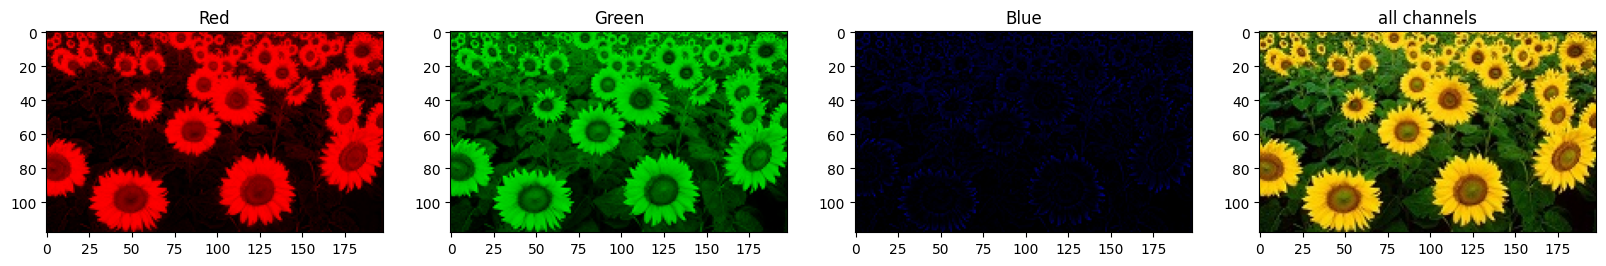

In [ ]:
# Create a zero matrix with the same shape as the Red channel
# `np.zeros_like(r, 'uint8')` creates a 2D array of zeros with the same dimensions as `r'
zeros = np.zeros_like(r, dtype='uint8')

# Merge channels to isolate individual color components
# - `red`: Only the Red channel is kept, while Blue and Green are set to zero
# - `green`: Only the Green channel is kept, while Blue and Red are set to zero
# - `blue`: Only the Blue channel is kept, while Green and Red are set to zero
red = cv2.merge([zeros, zeros, r])
green = cv2.merge([zeros, g, zeros])
blue = cv2.merge([b, zeros, zeros])

# Show the individual color components and the original image
plt.figure(figsize=[20, 5])

# Display the Red component in the first subplot (1 row, 4 columns, position 1)
plt.subplot(141); plt.imshow(red[..., ::-1], cmap='gray'); plt.title("Red")

# Display the Green component in the second subplot (1 row, 4 columns, position 2)
plt.subplot(142); plt.imshow(green[..., ::-1], cmap='gray'); plt.title("Green")

# Display the Blue component in the third subplot (1 row, 4 columns, position 3)
plt.subplot(143); plt.imshow(blue[..., ::-1], cmap='gray'); plt.title("Blue")

# Display the original image in the fourth subplot (1 row, 4 columns, position 4)
# `img[..., ::-1]` converts the image from BGR (OpenCV default) to RGB (Matplotlib default)
plt.subplot(144); plt.imshow(img[..., ::-1]); plt.title("All Channels");

<font color=#033ad3 size=4.5 face="Arial"><b>4️⃣ HSV</b></font><br/>

Hue: Color Value (0 – 179)<br/>
Saturation: Vibrancy of color (0-255)<br/>
Value: Brightness or intensity (0-255)<br/>

In [57]:
# Load the image from the specified path
# `cv2.imread` reads the image in BGR format by default
img = cv2.imread(path_img + "Flower.JPG")

# Convert the BGR image to HSV (Hue, Saturation, Value) color space
# `cv2.COLOR_BGR2HSV` is the flag used for this conversion
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

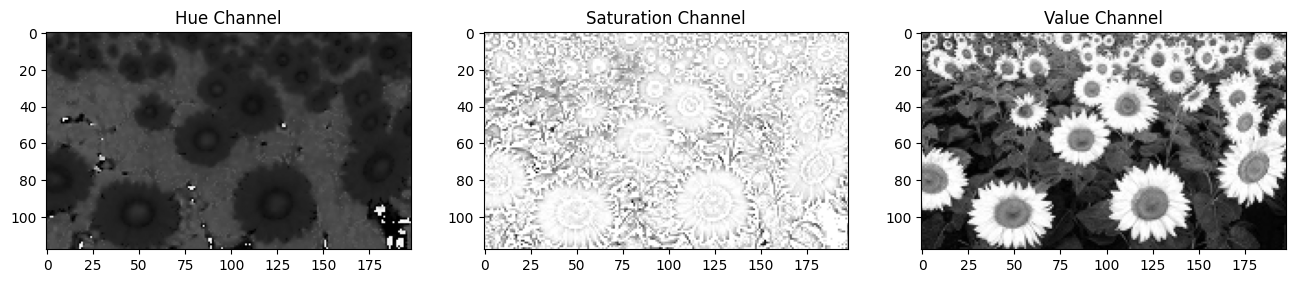

In [58]:
# Show the individual channels of the HSV image
plt.figure(figsize=[16, 4])

# Display the Hue channel in the first subplot
plt.subplot(131); plt.imshow(hsv_image[:, :, 0], cmap='gray'); plt.title("Hue Channel")

# Display the Saturation channel in the second subplot
plt.subplot(132); plt.imshow(hsv_image[:, :, 1], cmap='gray'); plt.title("Saturation Channel")

# Display the Value channel in the third subplot
plt.subplot(133); plt.imshow(hsv_image[:, :, 2], cmap='gray'); plt.title("Value Channel");

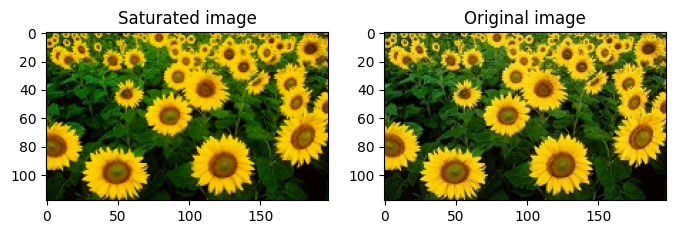

In [63]:
# Merge the HSV channels back together after increasing the saturation channel by 50.
saturated_image = cv2.merge([hsv_image[:, :, 0], cv2.add(hsv_image[:, :, 1], 50), hsv_image[:, :, 2]])

# Convert the modified HSV image back to BGR color space for display purposes.
saturated_image = cv2.cvtColor(saturated_image, cv2.COLOR_HSV2BGR)

# Set up a matplotlib figure with a specified size of 8x4 inches.
plt.figure(figsize=[8, 4])

# The image is converted from BGR to RGB using slicing [..., ::-1].
plt.subplot(121); plt.imshow(saturated_image[..., ::-1]); plt.title('Saturated image')
plt.subplot(122); plt.imshow(img[..., ::-1]); plt.title('Original image');

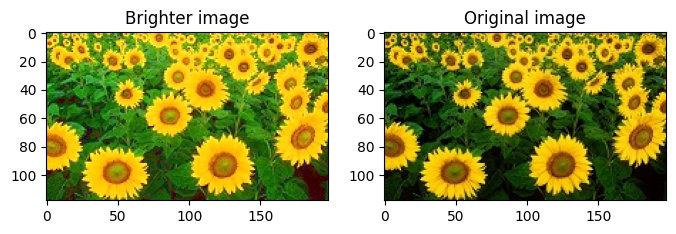

In [65]:
# Merge the HSV channels back together after increasing the value (brightness) channel by 50.
brighter_image = cv2.merge([hsv_image[:, :, 0], hsv_image[:, :, 1], cv2.add(hsv_image[:, :, 2], 50)])

# Convert the modified HSV image back to BGR color space for display purposes.
brighter_image = cv2.cvtColor(brighter_image, cv2.COLOR_HSV2BGR)

# Set up a matplotlib figure with a specified size of 8x4 inches.
plt.figure(figsize=[8, 4])

# The image is converted from BGR to RGB using slicing [..., ::-1].
plt.subplot(121); plt.imshow(brighter_image[..., ::-1]); plt.title('Brighter image')
plt.subplot(122); plt.imshow(img[..., ::-1]); plt.title('Original image');